In [1]:
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [37]:
from keras.models import Sequential
# import the core layers:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
labels_df = pd.read_pickle('labelsDF')
train_df = pd.read_pickle('trainDF')
test_df = pd.read_pickle('testDF')

#### Using splitting method only - using labels and train

In [16]:
X_train, X_test, y_train, y_test = train_test_split(train_df, labels_df, test_size=0.2, random_state=2)

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [47]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [49]:
print(y_train[0::100])

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [143]:
model = Sequential()

In [144]:
X_train.shape
y_train.shape

(17939, 10)

In [145]:
input_size = 3072
hidden_neurons = 500
out_size = 10

In [146]:
model.add(Dense(hidden_neurons,input_dim = input_size))
model.add(Activation('sigmoid'))

model.add(Dense(out_size, input_dim = hidden_neurons))
model.add(Activation('softmax'))

In [147]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [148]:
fitted_model = model.fit(X_train,y_train, validation_split=0.33, batch_size=256,epochs =20,verbose=1)

Train on 12019 samples, validate on 5920 samples
Epoch 1/20
12019/12019 [==============================] - 7s 541us/step - loss: 2.0852 - acc: 0.3043 - val_loss: 1.6568 - val_acc: 0.5169
Epoch 2/20
12019/12019 [==============================] - 5s 410us/step - loss: 1.4242 - acc: 0.5763 - val_loss: 1.3082 - val_acc: 0.5819
Epoch 3/20
12019/12019 [==============================] - 5s 435us/step - loss: 1.0646 - acc: 0.7214 - val_loss: 0.9421 - val_acc: 0.7642
Epoch 4/20
12019/12019 [==============================] - 5s 400us/step - loss: 0.8182 - acc: 0.8137 - val_loss: 0.7377 - val_acc: 0.8574
Epoch 5/20
12019/12019 [==============================] - 6s 512us/step - loss: 0.6609 - acc: 0.8591 - val_loss: 0.6314 - val_acc: 0.8522
Epoch 6/20
12019/12019 [==============================] - 5s 403us/step - loss: 0.5375 - acc: 0.8885 - val_loss: 0.5063 - val_acc: 0.9003
Epoch 7/20
12019/12019 [==============================] - 6s 474us/step - loss: 0.4397 - acc: 0.9135 - val_loss: 0.4439 - v

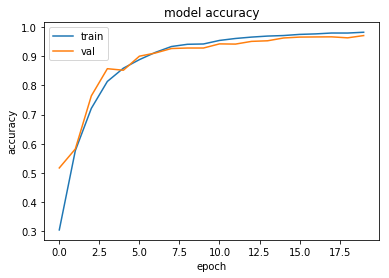

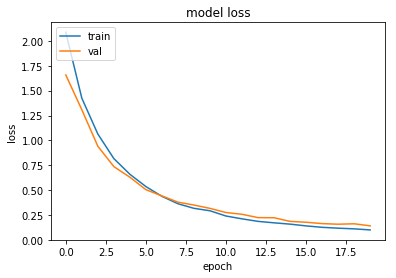

In [149]:


# summarize history for accuracy
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model.history['loss'])
plt.plot(fitted_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [150]:
# Prediction:
y_predict = model.predict(X_test, verbose=1)
print (y_predict.shape)

4485/4485 [==============================] - ETA:  - 1s 256us/step
(4485, 10)


In [151]:
# Evaluation:
score = model.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score[1])

4485/4485 [==============================] - 1s 167us/step
The accuracy is:  0.9701226309921962


### Model 2

In [152]:
model2 = Sequential()

In [153]:
X_train.shape
y_train.shape

(17939, 10)

In [154]:
input_size = 3072
hidden_neurons = 500
out_size = 10

In [155]:
model2.add(Dense(hidden_neurons,input_dim = input_size))
model2.add(Activation('sigmoid'))

model2.add(Dense(out_size, input_dim = hidden_neurons))
model2.add(Activation('softmax'))

In [156]:
model2.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [157]:
fitted_model2 = model2.fit(X_train,y_train, validation_split=0.33, batch_size=512,epochs = 20,verbose=1)

Train on 12019 samples, validate on 5920 samples
Epoch 1/20
12019/12019 [==============================] - 6s 459us/step - loss: 2.3623 - acc: 0.2153 - val_loss: 1.9587 - val_acc: 0.3858
Epoch 2/20
12019/12019 [==============================] - 4s 306us/step - loss: 1.7209 - acc: 0.4740 - val_loss: 1.5433 - val_acc: 0.5510
Epoch 3/20
12019/12019 [==============================] - 4s 365us/step - loss: 1.3705 - acc: 0.6092 - val_loss: 1.2339 - val_acc: 0.6797
Epoch 4/20
12019/12019 [==============================] - 4s 316us/step - loss: 1.1034 - acc: 0.7399 - val_loss: 1.0388 - val_acc: 0.7258
Epoch 5/20
12019/12019 [==============================] - 4s 349us/step - loss: 0.9329 - acc: 0.7830 - val_loss: 0.8728 - val_acc: 0.8061
Epoch 6/20
12019/12019 [==============================] - 5s 392us/step - loss: 0.7773 - acc: 0.8348 - val_loss: 0.7636 - val_acc: 0.8188
Epoch 7/20
12019/12019 [==============================] - 4s 312us/step - loss: 0.6698 - acc: 0.8591 - val_loss: 0.6549 - v

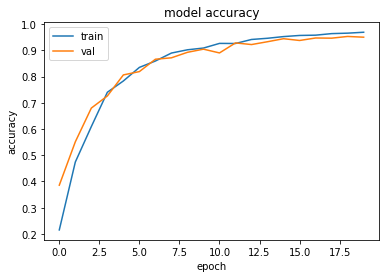

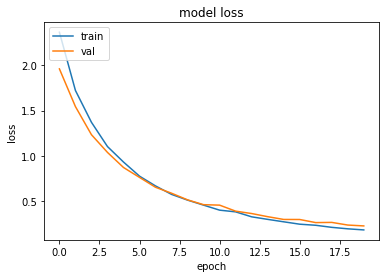

In [158]:


# summarize history for accuracy
plt.plot(fitted_model2.history['acc'])
plt.plot(fitted_model2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model2.history['loss'])
plt.plot(fitted_model2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [160]:
# Evaluation:
score2 = model2.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score2[1])

4485/4485 [==============================] - 1s 175us/step
The accuracy is:  0.9569676700111482


In [184]:
model3 = Sequential()

In [185]:
X_train.shape
y_train.shape

(17939, 10)

In [186]:
input_size = 3072
hidden_neurons = 500
out_size = 10

In [187]:
model3.add(Dense(hidden_neurons,input_dim = input_size))
model3.add(Activation('sigmoid'))

model3.add(Dense(out_size, input_dim = hidden_neurons))
model3.add(Activation('softmax'))

In [188]:
model3.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='Adam')

In [189]:
fitted_model3 = model3.fit(X_train,y_train, validation_split=0.33, batch_size=32,epochs = 15,verbose=1)

Train on 12019 samples, validate on 5920 samples
Epoch 1/15
12019/12019 [==============================] - 19s 2ms/step - loss: 1.4866 - acc: 0.5105 - val_loss: 0.9266 - val_acc: 0.7316
Epoch 2/15
12019/12019 [==============================] - 17s 1ms/step - loss: 0.6424 - acc: 0.8254 - val_loss: 0.4885 - val_acc: 0.8704
Epoch 3/15
12019/12019 [==============================] - 17s 1ms/step - loss: 0.3883 - acc: 0.8972 - val_loss: 0.4282 - val_acc: 0.8834
Epoch 4/15
12019/12019 [==============================] - 18s 1ms/step - loss: 0.2538 - acc: 0.9354 - val_loss: 0.3237 - val_acc: 0.9012
Epoch 5/15
12019/12019 [==============================] - 18s 1ms/step - loss: 0.1897 - acc: 0.9523 - val_loss: 0.1898 - val_acc: 0.9483
Epoch 6/15
12019/12019 [==============================] - 18s 1ms/step - loss: 0.1539 - acc: 0.9580 - val_loss: 0.1849 - val_acc: 0.9527
Epoch 7/15
12019/12019 [==============================] - 18s 1ms/step - loss: 0.1116 - acc: 0.9718 - val_loss: 0.1379 - val_acc:

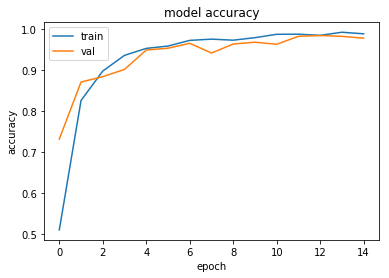

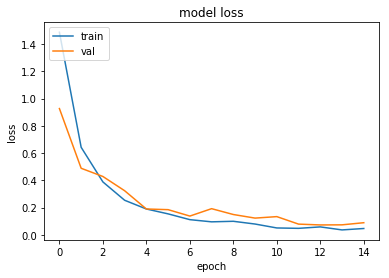

In [190]:


# summarize history for accuracy
plt.plot(fitted_model3.history['acc'])
plt.plot(fitted_model3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(fitted_model3.history['loss'])
plt.plot(fitted_model3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [191]:
# Evaluation:
score3 = model3.evaluate(X_test, y_test, verbose=1)
print('The accuracy is: ', score3[1])

4485/4485 [==============================] - 1s 186us/step
The accuracy is:  0.9768115942028985


In [ ]:
### Model 3